In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('1_raw_data_13-12_22.03.16.csv')

ch1 = df[df.columns[1]].to_numpy()
ch2 = df[df.columns[2]].to_numpy()
ch3 = df[df.columns[3]].to_numpy()
ch4 = df[df.columns[4]].to_numpy()
ch5 = df[df.columns[5]].to_numpy()
ch6 = df[df.columns[6]].to_numpy()
ch7 = df[df.columns[7]].to_numpy()
ch8 = df[df.columns[8]].to_numpy()
label = df[df.columns[9]].to_numpy()

ch2_len = len(ch2)
print(ch1)

[ 1.e-05  1.e-05 -1.e-05 ... -1.e-05 -1.e-05 -1.e-05]


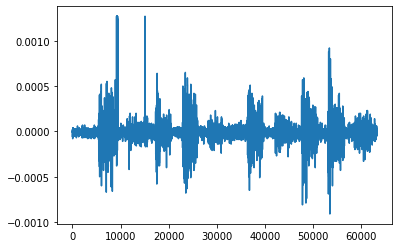

In [3]:
plt.plot(ch3)

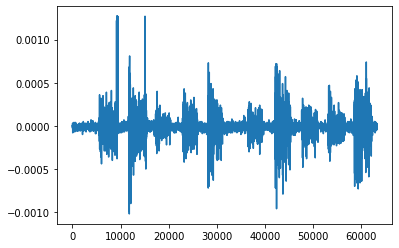

In [4]:
plt.plot(ch2)

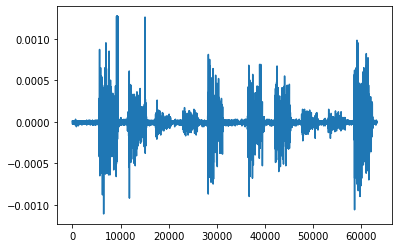

In [5]:
plt.plot(ch1)

In [6]:
import scipy

In [7]:
arr = ch2
arr_fft = scipy.fft(arr)
arr_fft

array([-0.55536   +0.j        ,  0.0518181 -0.05090062j,
       -0.02918391-0.10686578j, ..., -0.08609554+0.04584162j,
       -0.02918391+0.10686578j,  0.0518181 +0.05090062j])

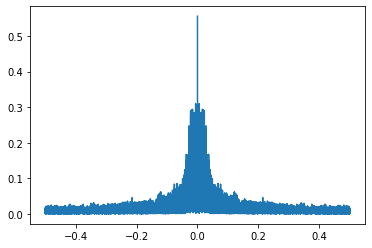

In [8]:
freq = np.fft.fftfreq(ch2.shape[-1])
plt.figure()
plt.plot(freq, abs(arr_fft))

C:\Users\Priya\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


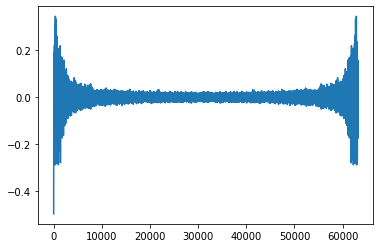

In [9]:
arr4 = ch1
arr_fft4 = scipy.fft(arr4)
plt.plot(arr_fft4)

63196
63196
[ 0.          0.00015824  0.00031648 ... -0.00047471 -0.00031648
 -0.00015824]


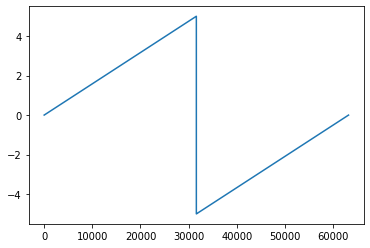

In [10]:
n = arr4.size
print(n)
print(len(arr4))
freq = np.fft.fftfreq(n, d=0.1)
print(freq)
plt.plot(freq)

63196
31598


C:\Users\Priya\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


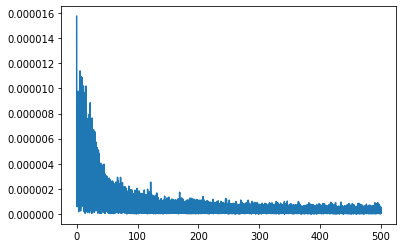

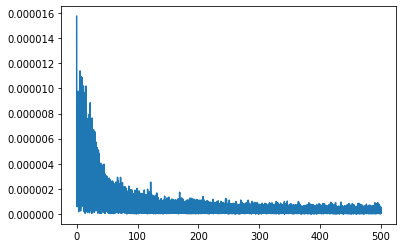

In [11]:
# Number of samplepoints
N = len(arr4)
# sample spacing
T = 1.0 / 1000.0
#x = np.linspace(0.0, N*T, N)
#print(x)
y = arr4
yf = scipy.fft(y)
print(len(yf))
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)
print(len(xf))
#plt.figure(figsize = (400,50))
fig, ax = plt.subplots()

amp_list = []

amp_list=2.0/N * np.abs(yf[:N//2])


ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()
plt.figure()
plt.plot(xf, amp_list)

In [18]:
dict_freq_amp = {}
for i,j in enumerate(xf):
    dict_freq_amp[j] = amp_list[i]
len(dict_freq_amp)

31598

[180.0,
 -41.83249310487467,
 -120.80996666818363,
 -172.24529598318108,
 139.89466413915937,
 65.23489903765827,
 15.722328840831736,
 -67.2550063077385,
 -106.79653638768829,
 -159.60131246064552,
 -154.3461110947546,
 120.87331800918916,
 32.651076810050064,
 34.42988929723903,
 -34.09851134001307,
 -44.28170422576714,
 -118.342924559861,
 -129.03502995584932,
 123.64169080042086,
 109.47351769764265,
 11.560386225328271,
 10.964640720127527,
 -59.665434552842775,
 -108.3579220132906,
 169.25842026180487,
 113.83899357801643,
 82.33534472531231,
 -7.334151788309042,
 35.8895280353068,
 -164.97137351646586,
 136.9527509756523,
 112.43305323398515,
 176.19737089169348]

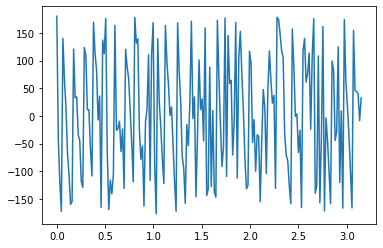

In [28]:
import math
phase = []

for i,_ in enumerate(yf):
    phase.append(math.atan2(np.imag(yf[i]),np.real(yf[i]))*180/math.pi) 
#plot(xf,phase);
plt.figure()
#plt.plot(xf, phase)
plt.plot(xf[:200],phase[:200])
phase[:33]

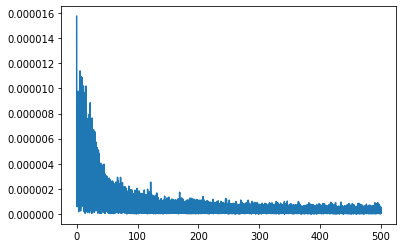

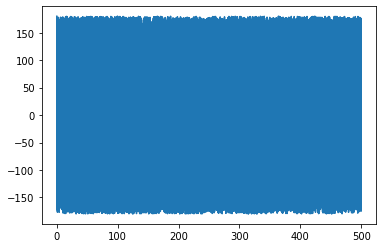

In [51]:
#To get only few fequencies, you can make i%value (32,64...)
req_freq_list = {}
req_phase_list = {}
count  = 0
for i,j in enumerate(dict_freq_amp.keys()):
    #if (i):
    #print(count,i,j)
    req_freq_list[j] = dict_freq_amp[j]
    req_phase_list[j] = phase[i]
    count = count + 1
#x, y = zip(*dict_freq_amp.values())
plt.figure()
plt.plot(list(req_freq_list.keys()),list(req_freq_list.values()))
#req_freq_list
plt.figure()
plt.plot(list(req_phase_list.keys()),list(req_phase_list.values()))


31598


1

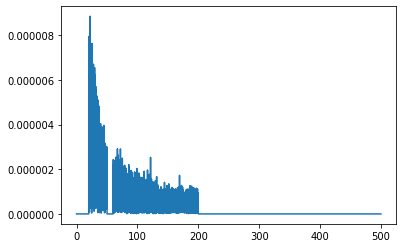

In [77]:
print(len(req_freq_list))
lst = []
for i in req_freq_list.keys():
    if (i <= 20) or (i >= 200):
        lst.append(0)
    elif (i >=50) and (i <=60):
        lst.append(0)
    else:
        lst.append(1) 
        
products = []
for num1, num2 in zip(lst, list(req_freq_list.values())):
    products.append(num1 * num2)
plt.plot(list(req_freq_list.keys()), products)

In [54]:
len(products)

31598

In [67]:
len(yf)
act_fft = 2.0/N * yf[:N//2]
len(act_fft)

31598

In [78]:
ifft_ip = []
for i,_ in enumerate(lst):
    ifft_ip.append(lst[i] * act_fft[i])

(-3.5019287680661194e-07-1.043698780070652e-06j) 1


In [80]:
reconstructed_signal = scipy.ifft(ifft_ip)
reconstructed_signal

array([-5.67067689e-11-5.16858759e-10j, -7.29129237e-11-2.28316956e-10j,
       -2.17973738e-10-4.64364138e-10j, ...,
       -4.15774602e-10+2.39622001e-11j, -5.73620000e-10-7.83856018e-11j,
       -5.06026894e-10-4.82278011e-10j])

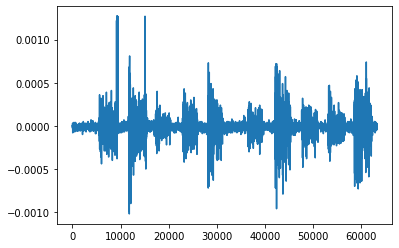

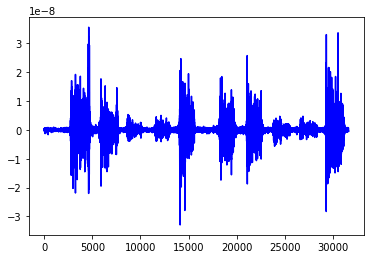

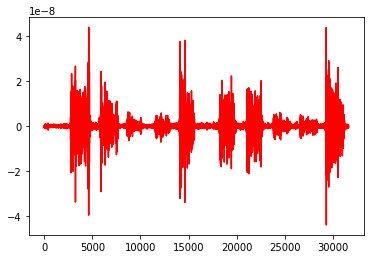

In [85]:
t = np.arange(31598)
plt.figure()
plt.plot(ch2)
plt.figure()
plt.plot(t, reconstructed_signal.real, 'b-')
plt.figure()
plt.plot(t, reconstructed_signal.imag, 'r-')